>[Datetime module in python](#scrollTo=sd9X0i_2LJwl)

>>[1. 🧱 datetime.datetime](#scrollTo=G6idYatSbSFC)

>>[Timestamp and it's representations](#scrollTo=1C-s0J379P4n)

>[1. Unix Timestamp](#scrollTo=1C-s0J379P4n)

>[2.Datetime object (Python)](#scrollTo=1C-s0J379P4n)

>[3.String-based timestamp](#scrollTo=1C-s0J379P4n)

>[4. ISO 8601 timestamp](#scrollTo=1C-s0J379P4n)

>[UTC vs Time zone](#scrollTo=ggWF2aR6Ezq9)

>[📦 What is zoneinfo?](#scrollTo=WaGJtOkUXudx)

>>[🔍 Where to find valid time zone names?](#scrollTo=x0Bvoql0ZeTw)

>[🧠 Naive vs Aware datetime objects (in Python)](#scrollTo=SKWVS9zGa6Ka)

>[Datetime Common Attributes](#scrollTo=KfAY7bKXRH32)

>[🧠 strptime()    vs strftime()](#scrollTo=5lviKG0FSZqv)

>>>[🧩 Format Codes You Need to Know](#scrollTo=q3LlKXgMWL9B)

>>>[Real-Life Data Engineering Scenarios](#scrollTo=C1v74funbK_s)

>[🗓️ Multiple Date Strings in Different Formats](#scrollTo=B7w8aiQHeRiW)

>[Timedelta.](#scrollTo=cBj89F0cBlUc)

>[generating random date](#scrollTo=Sus00znn61Q4)

>[Using datetime in Pandas](#scrollTo=pJfW3TPgypfM)

>[✅ Best Practice: Use pd.to_datetime() with format=...](#scrollTo=xdHk7ygp32ba)

>[What is Resampling in Pandas?](#scrollTo=pbZkA29QEcH3)

>>[🧱 Prerequisite: You must set the datetime column as the index!](#scrollTo=pbZkA29QEcH3)



# **Datetime module in python**
The datetime module in Python is essential for any data engineer. It allows you to work with dates and times — which is especially important in ETL pipelines, log processing, event tracking, data cleaning, time-based partitioning, and feature engineering.

The main datetime module objects in Python are:
1. 🧱 datetime.datetime
2.📅 datetime.date
3.⏰ datetime.time
4.⌛ datetime.timedelta
5.🌐 datetime.timezone
6.🗃️ datetime.tzinfo (Advanced)

##**1. 🧱 datetime.datetime**
Represents: A complete timestamp — both date and time like **: 2025-04-21 14:30:00**

✅ Most commonly used object in real-world ETL/data pipelines.

 ✅Most real-world data (logs, events, transactions) have timestamps, not just dates.

✅Includes: year, month, day, hour, minute, second, microsecond, and optional timezone.


##**Timestamp and it's representations**
A timestamp is a precise representation of a specific point in time.

#**1. Unix Timestamp**

Type: int or float , machine readable

Meaning: Number of seconds (or milliseconds) since 1970-01-01 00:00:00 UTC

Example: 1745255872.54321

🔹 Use in: APIs, logs, NoSQL databases, time-series databases.

#**2.Datetime object (Python)**

Type: Python datetime.datetime

Contains: year, month, day, hour, minute, second, microsecond (+ optional timezone)

Example: datetime(2025, 4, 21, 15, 30)

🔹 Use in: Python code, transformations, scheduling.


#**3.String-based timestamp**
Type: str

Meaning: Human-readable time

Format: "YYYY-MM-DD HH:MM:SS" (can vary)

Example: "2025-04-21 15:30:00"

🔹 Use in: CSV files, APIs, reports, UI.

#**4. ISO 8601 timestamp**

Type: str (standardized) human readable

Meaning: International standard format for timestamps

Format: "2025-04-21T15:30:00Z" or "2025-04-21T15:30:00+03:00"

🔹 Use in: APIs (REST, JSON), logging, cross-system communication.




#**UTC vs Time zone**

🔸 UTC = standard, stable, safe for systems.

🔥 Use UTC for:

Logs, timestamps, storage, API exchange, sorting



🔸 Time Zones = user-friendly, region-specific, often confusing

🌍 Use Time Zones for:

UI display, reporting, local scheduling

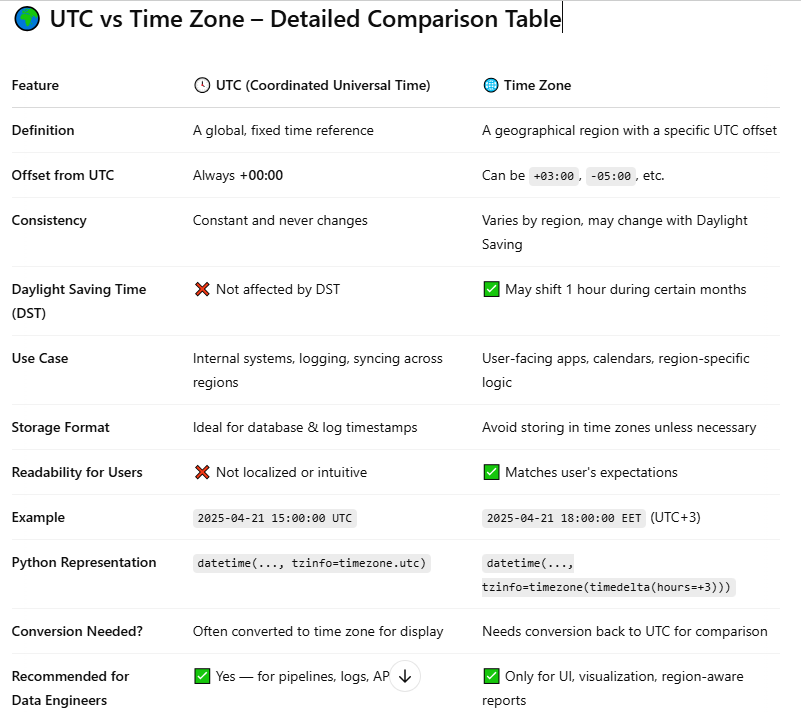

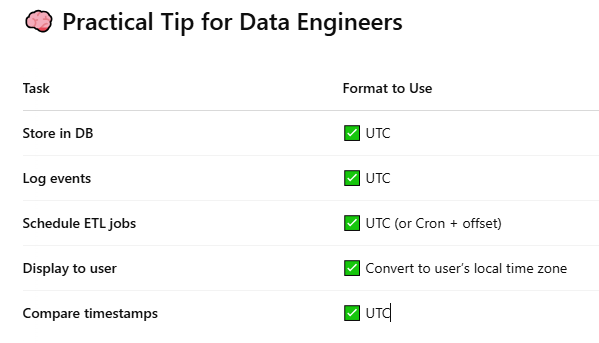

In [ ]:
from datetime import datetime

In [ ]:
#1. Create manually
dt = datetime(2025, 4, 21, 15, 30, 0)  # year, month, day, hour, minute, second
print(dt)
# → 2025-04-21 15:30:00

2025-04-21 15:30:00


In [ ]:
 # Get current time

now = datetime.now()  # Local time
utc_now = datetime.utcnow()  # UTC without tzinfo
print(f'local time is {now} ')
print(f'UTC time is {utc_now}')

local time is 2025-04-21 17:05:25.822249 
UTC time is 2025-04-21 17:05:25.822308


In [ ]:
from datetime import datetime

now = datetime.now()
utc_now = datetime.utcnow()

print("Local now: ", now)
print("UTC now:   ", utc_now)

Local now:  2025-04-21 17:07:18.051574
UTC now:    2025-04-21 17:07:18.051606


In [ ]:
#my system clock is set to UTC or your system’s local time zone is UTC.
from datetime import datetime, timezone

# Get the current local time (naive datetime object)
local = datetime.now()
# Get the current UTC time (naive datetime object)
utc = datetime.utcnow()
# Get the current UTC time (aware datetime object with timezone information)
utc_aware = datetime.now(timezone.utc)

# Print the local, UTC (naive), and UTC (aware) times
print("Local naive:    ", local)  # Local time without timezone info
print("UTC naive:      ", utc)  # UTC time without timezone info
print("UTC aware:      ", utc_aware)  # UTC time with timezone info

Local naive:     2025-04-21 17:14:15.998582
UTC naive:       2025-04-21 17:14:15.998635
UTC aware:       2025-04-21 17:14:15.998686+00:00


In [ ]:
utc_aware = datetime.now(timezone.utc)
print("UTC aware:      ", utc_aware)


UTC aware:       2025-04-21 17:15:49.147839+00:00


# **📦 What is zoneinfo?**
zoneinfo is a module that allows you to :

Create an aware datetime in a specific time zone

Work with real-world time zones (like daylight saving time)

Convert between UTC and local times

Attach timezone info to a datetime object

In [ ]:
from datetime import datetime
from zoneinfo import ZoneInfo
# Example: Cairo
local = datetime.now(tz=ZoneInfo("Africa/Cairo"))
print("Cairo Time:     ", local)

Cairo Time:      2025-04-22 18:14:08.262281+02:00


In [ ]:
dt = datetime(2025, 4, 21, 15, 30, tzinfo=ZoneInfo("Africa/Cairo"))
print(dt)
# → 2025-04-21 15:30:00+02:00

2025-04-21 15:30:00+02:00


In [ ]:
#Convert from one time zone to another
utc_time = datetime(2025, 4, 21, 13, 0, tzinfo=ZoneInfo("UTC"))

# Convert to New York time
ny_time = utc_time.astimezone(ZoneInfo("America/New_York"))

print("UTC time:   ", utc_time)
print("New York:   ", ny_time)

UTC time:    2025-04-21 13:00:00+02:00
New York:    2025-04-21 07:00:00-04:00


## **🔍 Where to find valid time zone names?**

Use zoneinfo.available_timezones() (Python 3.11+)
Or check this reference: IANA Time Zone Database

Examples:

"UTC"

"Europe/London"

"Asia/Cairo"

"America/New_York"

"Africa/Nairobi"




# **🧠 Naive vs Aware datetime objects (in Python)**
➤ Naive datetime
A datetime that does NOT know what time zone it's in.

➤ Aware datetime
A datetime that includes time zone info (tzinfo) — so it knows where it is in the world 🌍.

In [ ]:
from datetime import datetime, timezone
from zoneinfo import ZoneInfo

# Naive datetime (no tzinfo)
naive = datetime(2025, 4, 21, 15, 30)

# Aware datetime (UTC)
aware_utc = datetime(2025, 4, 21, 15, 30, tzinfo=timezone.utc) #tzinfo=ZoneInfo("UTC")

# Aware datetime (Cairo)
aware_cairo = datetime(2025, 4, 21, 15, 30, tzinfo=ZoneInfo("Africa/Cairo"))
print("Naive:       ", naive)
print("Aware UTC:   ", aware_utc)
print("Aware Cairo: ", aware_cairo)

Naive:        2025-04-21 15:30:00
Aware UTC:    2025-04-21 15:30:00+00:00
Aware Cairo:  2025-04-21 15:30:00+02:00


In [ ]:
ts = 1745255872  # Unix timestamp

print(datetime.utcfromtimestamp(ts))      # → UTC interpretation
print(datetime.fromtimestamp(ts))         # → Local time (system-dependent)

2025-04-21 17:17:52
2025-04-21 17:17:52


#**Datetime Common Attributes**

In [ ]:
from datetime import datetime

In [ ]:
from datetime import datetime
from zoneinfo import ZoneInfo
dt = datetime(2025, 4, 21, 14, 30, 45)
dt_aware = dt.astimezone(ZoneInfo("Africa/Cairo"))
print(dt.year)         # 2025
print(dt.month)        # 4
print(dt.day)          # 21
print(dt.hour)         # 14
print(dt.minute)       # 30
print(dt.second)       # 45
print(dt.microsecond)  # 0
print(dt.tzinfo)       # None (naive by default)
print(dt_aware)       # None (naive by default)

2025
4
21
14
30
45
0
None
2025-04-21 16:30:45+02:00


#**🧠 strptime()	vs strftime()**

strftime() Format datetime to string

syntax

dt.strftime(format_string)

**************************************

strptime() Parse string into datetime

syntax

datetime.strptime(date_string, format_string)



In [ ]:
from datetime import datetime

date_str = "2025-04-21 14:30:00"
dt = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

print(dt)
# Output: 2025-04-21 14:30:00
print(type(dt))
# Output: <class 'datetime.datetime'>

2025-04-21 14:30:00
<class 'datetime.datetime'>


In [ ]:
dt = datetime(2025, 4, 21, 14, 30, 0)

formatted = dt.strftime("%Y/%m/%d %I:%M %p")
print(formatted)
# Output: '2025/04/21 02:30 PM'


2025/04/21 02:30 PM


In [ ]:
curr_dt = datetime.now()
print(curr_dt)
formated_dt = curr_dt.strftime("%Y/%m/%d %I:%M %p")
print(formated_dt)

2025-04-22 11:50:53.432293
2025/04/22 11:50 AM


### **🧩 Format Codes You Need to Know**

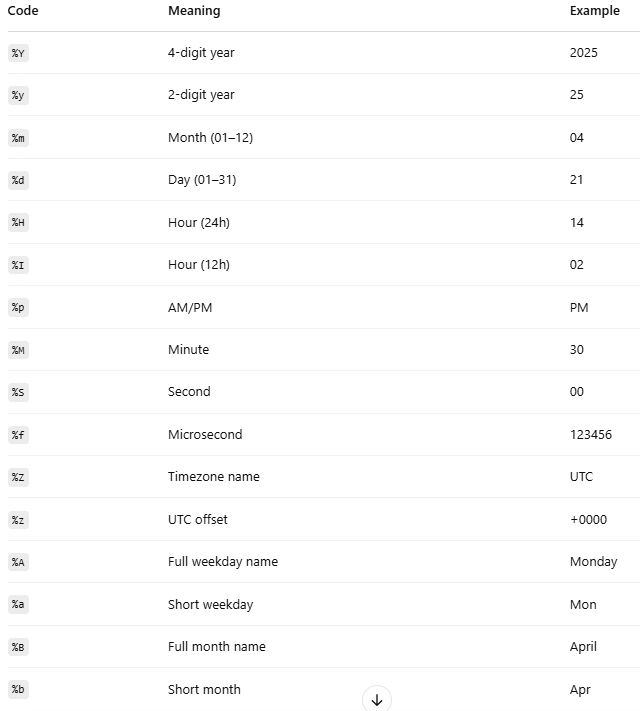

###**Real-Life Data Engineering Scenarios**


In [ ]:
### ✅ Parse log line timestamp:     date-->format-->str
log = "2025-04-21 23:59:59 - Job Completed" # string
timestamp = log.split()[0] + " " + log.split()[1]  # equivlant to log[:19]
formatted_ts = datetime.strptime(timestamp,"%Y-%m-%d %H:%M:%S")
print(formatted_ts)

2025-04-21 23:59:59


In [ ]:
dt_now = datetime.now()
print(dt_now)
str_dt = dt_now.strftime("%Y-%m-%d %H:%M:%S")   #strftime take the format you want only
print(str_dt)

2025-04-22 13:01:35.219580
2025-04-22 13:01:35


In [ ]:
#Read data with bad formats
dirty_time = "04-21-2025"
clean_dt = datetime.strptime(dirty_time, "%m-%d-%Y")
clean_dt

datetime.datetime(2025, 4, 21, 0, 0)

In [ ]:
now = datetime.now()
filename = f"backup_{now.strftime('year=%Y-month =%m%d_%H%M%S')}.csv"
filename

'backup_year=2025-month =0422_132613.csv'

In [ ]:
#3. ETL output for versioning
filename = f"cleaned_data_v_{now.strftime('%Y%m%d_%H%M%S')}.json"
# → cleaned_data_v_20250421_183045.json

<class 'str'>


In [ ]:
date = datetime.now().date()
print(date)
time = datetime.now().time()
print(time)
date = datetime.today().date()
print(date)
time = datetime.today().time()
print(time)

2025-04-22
14:23:01.190789
2025-04-22
14:23:01.191240


#**🗓️ Multiple Date Strings in Different Formats**


In [ ]:
str_dates = [
    "2025-04-21",                  # YYYY-MM-DD
    "21/04/2025",                  # DD/MM/YYYY
    "April 21, 2025",              # Month DD, YYYY
    "21-Apr-2025",                # DD-Mon-YYYY
    "20250421",                    # YYYYMMDD
    "2025/04/21 15:30:00",         # YYYY/MM/DD HH:MM:SS
    "21 Apr 2025 15:30",           # DD Mon YYYY HH:MM
    "Monday, April 21, 2025",      # Full day name, Month DD, YYYY
    "2025-04-21T15:30:00",         # ISO-like with T separator
    "2025-04-21 15:30:00.123456",  # With microseconds
]

In [ ]:
date = datetime.strptime("2025-04-21",'%Y-%m-%d')
print(date)

date = datetime.strptime("21/04/2025",'%d/%m/%Y')
print(date)

date = datetime.strptime("April 21, 2025",'%B %d, %Y')
print(date)

date = datetime.strptime("21-Apr-2025",'%d-%b-%Y')
print(date)

date = datetime.strptime("20250421",'%Y%M%d')
print(date)

date = datetime.strptime("2025/04/21 15:30:00", "%Y/%m/%d  %H:%M:%S")
print(date)

date = datetime.strptime("Monday, April 21, 2025", "%A, %B %d, %Y")
print(date)

date = datetime.strptime("2025-04-21T15:30:00", "%Y-%m-%dT%H:%M:%S")
print(date)



2025-04-21 00:00:00
2025-04-21 00:00:00
2025-04-21 00:00:00
2025-04-21 00:00:00
2025-01-21 00:04:00
2025-04-21 15:30:00
2025-04-21 00:00:00
2025-04-21 15:30:00


#**Timedelta**.

It’s a module that represents a difference between two dates or times
any data engineer a must-know when working with time-based calculations, such as:

calculating time differences,

filtering logs

generating date ranges

scheduling jobs

**Timedelta will automatically normalize everything into:**

days hours minutes seconds microseconds

In [ ]:
td = timedelta(days=10, hours=48, minutes=30)
print(td)

12 days, 0:30:00


In [ ]:
#3. 🧮 Difference between two datetime objects

dt1 = datetime(2025, 4, 20, 12, 0, 0)   # of type datetime.datetime
dt2 = datetime(2025, 4, 21, 15, 30, 0) # of type datetime.datetime
delta = dt2 - dt1   # of type datetime.timedelta
print("Timedelta:", delta)
print("Days:", delta.days)
print("Total seconds:", delta.total_seconds())
print("Total seconds:", delta.total_seconds()/(60*60))

Timedelta: 1 day, 3:30:00
Days: 1
Total seconds: 99000.0
Total seconds: 27.5


In [ ]:
from datetime import datetime, timedelta

now = datetime.now()
future = now + timedelta(days=2, hours=3)

print("Now:", now)
print("Future:", future)


Now: 2025-04-22 15:29:33.613466
Future: 2025-04-24 18:29:33.613466


In [ ]:
print(type(timedelta(days=2)))

<class 'datetime.timedelta'>


In [ ]:
from datetime import datetime, timedelta

start = datetime.now()
# ... your ETL job here ...
for i in range(10000000):
  continue

end = datetime.now()

duration = end - start
print("ETL took:", duration)


ETL took: 0:00:00.396355


In [ ]:
dt1 = datetime(2025, 4, 20, 12, 0, 0)
dt2 = datetime(2025, 4, 21, 15, 30, 0)
delta = dt2 - dt1
type(delta)

datetime.timedelta

#**generating random date**

In [ ]:
import random
from datetime import datetime, timedelta
def generate_random_date():
    start_date = datetime(2023, 1, 1)
    return (start_date + timedelta(days=random.randint(0, 59))).strftime("%Y-%m-%d")
date = generate_random_date()
for i in range(10):
  print(generate_random_date())


In [ ]:
ts = dt.timestamp()                 # datetime → timestamp
dt = datetime.fromtimestamp(ts)    # timestamp → local datetime "naive"
dt_utc = datetime.utcfromtimestamp(ts) # timestamp → UTC datetime "naive"
print(ts)
print(dt)
print(dt_utc)

#**Using datetime in Pandas**
When you're working with a column in a DataFrame that contains datetime objects, and you want to extract parts like the day, month, year, hour, etc., you use the **.dt** accessor.

then you can perform any datetime method like that

 pd.to_datetime(df['column']).dt.[method]

In [ ]:
# From string column to datetime:
# create columns year month
import pandas as pd

df = pd.DataFrame({
    'date_time': ['2025-04-21 15:30:00', '2025-04-22 10:45:00']
})

df['date'] = pd.to_datetime(df['date_time'])
df['date_formatted'] = pd.to_datetime(df['date_time']).dt.strftime('%Y-%m-%d') #format in any pattern you want but the given column must be in datetime pattern
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['day'] = pd.to_datetime(df['date_time']).dt.day
print(df)

             date_time                date date_formatted  year  month  day
0  2025-04-21 15:30:00 2025-04-21 15:30:00       04-04-21  2025      4   21
1  2025-04-22 10:45:00 2025-04-22 10:45:00       04-04-22  2025      4   22


#**✅ Best Practice: Use pd.to_datetime() with format=...**
When converting strings in a column to datetime using a specific format, use pd.to_datetime() with the format parameter — it’s vectorized (fast) and clean:

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'date_str': ['21-04-2025 15:30:00', '22-04-2025 10:45:00']
})

 #we deal with data_str as string column and we put it in a date time format
df['date'] = pd.to_datetime(df['date_str'], format='%d-%m-%Y %H:%M:%S')  #like strptime = parse string to datetime
print(df)

              date_str                date
0  21-04-2025 15:30:00 2025-04-21 15:30:00
1  22-04-2025 10:45:00 2025-04-22 10:45:00


In [ ]:
#craeting column of datetimes
import pandas as pd

# Simulated log data
df = pd.DataFrame({
    'timestamp': pd.date_range(start="2025-04-21 00:00", periods=60, freq='d'),
    'value': range(60)
})

df.set_index('timestamp', inplace=True)
print(df)

In [ ]:
#DataFrame with 60 different datetime values

import pandas as pd
from datetime import datetime, timedelta
from random import randint

# Start from this datetime
start_datetime = datetime(2025, 1, 1, 8, 0, 0)  # April 1st, 2025 at 08:00 AM

# Generate list of 60 datetime values, 1 hour apart
datetimes = [start_datetime + timedelta(hours=randint(1,90000)) for i in range(60)]

# Create DataFrame
df = pd.DataFrame({'timestamp': datetimes})
df

# **What is Resampling in Pandas?**
Resampling means changing the frequency of time-series data, usually on a datetime index. It’s like groupby() but over time intervals.

##**🧱 Prerequisite: You must set the datetime column as the index!**



In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Generate hourly data for 3 days
timestamps = [datetime(2025, 4, 1) + timedelta(hours=i) for i in range(72)]
values = np.random.randint(10, 100, size=72)

df = pd.DataFrame({'timestamp': timestamps, 'value': values})
df.set_index('timestamp', inplace=True) #must for groupping

# Resample to daily and take average
daily_avg = df.resample('D').mean()
print(df)
print("******************")
print(daily_avg)
df.resample('D').agg(['min', 'max', 'mean'])  # Multiple aggregations

                     value
timestamp                 
2025-04-01 00:00:00     77
2025-04-01 01:00:00     97
2025-04-01 02:00:00     66
2025-04-01 03:00:00     47
2025-04-01 04:00:00     62
...                    ...
2025-04-03 19:00:00     80
2025-04-03 20:00:00     63
2025-04-03 21:00:00     95
2025-04-03 22:00:00     12
2025-04-03 23:00:00     44

[72 rows x 1 columns]
******************
                value
timestamp            
2025-04-01  57.625000
2025-04-02  49.166667
2025-04-03  54.875000


value               
             min max       mean
timestamp                      
2025-04-01    14  97  57.625000
2025-04-02    12  97  49.166667
2025-04-03    12  95  54.875000

### **🧠 9. Creating Date Ranges**
You can simulate time series or generate custom date ranges:

In [ ]:
#time_series_data = pd.date_range(start='2025-04-21', periods=10, freq='D')
time_series = pd.date_range(start='2025-04-21 00:00', end='2025-04-21 01:00', freq='15min')
time_series

DatetimeIndex(['2025-04-21 00:00:00', '2025-04-21 00:15:00',
               '2025-04-21 00:30:00', '2025-04-21 00:45:00',
               '2025-04-21 01:00:00'],
              dtype='datetime64[ns]', freq='15min')

In [ ]:
df = pd.DataFrame({'date': ['2025-04-21', 'sd']})
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Invalids become NaT

In [ ]:
df

,date
0,2025-04-21
1,NaT
